# Data Visualization - Python 

In [1]:
# Loading required libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the datasets
# %pwd
header = ['year', 'primary_type', 'district', 'number', 'count']
df = pd.read_csv('crimes_reduced.csv', sep= '\t', names=header)
#df.head()
area_codes = pd.read_csv('area_code.csv')
#area_codes.head()

#### 10) Plot a horizontal bar chart with Community (Y axis) and Count of crimes involving children (X axis) 

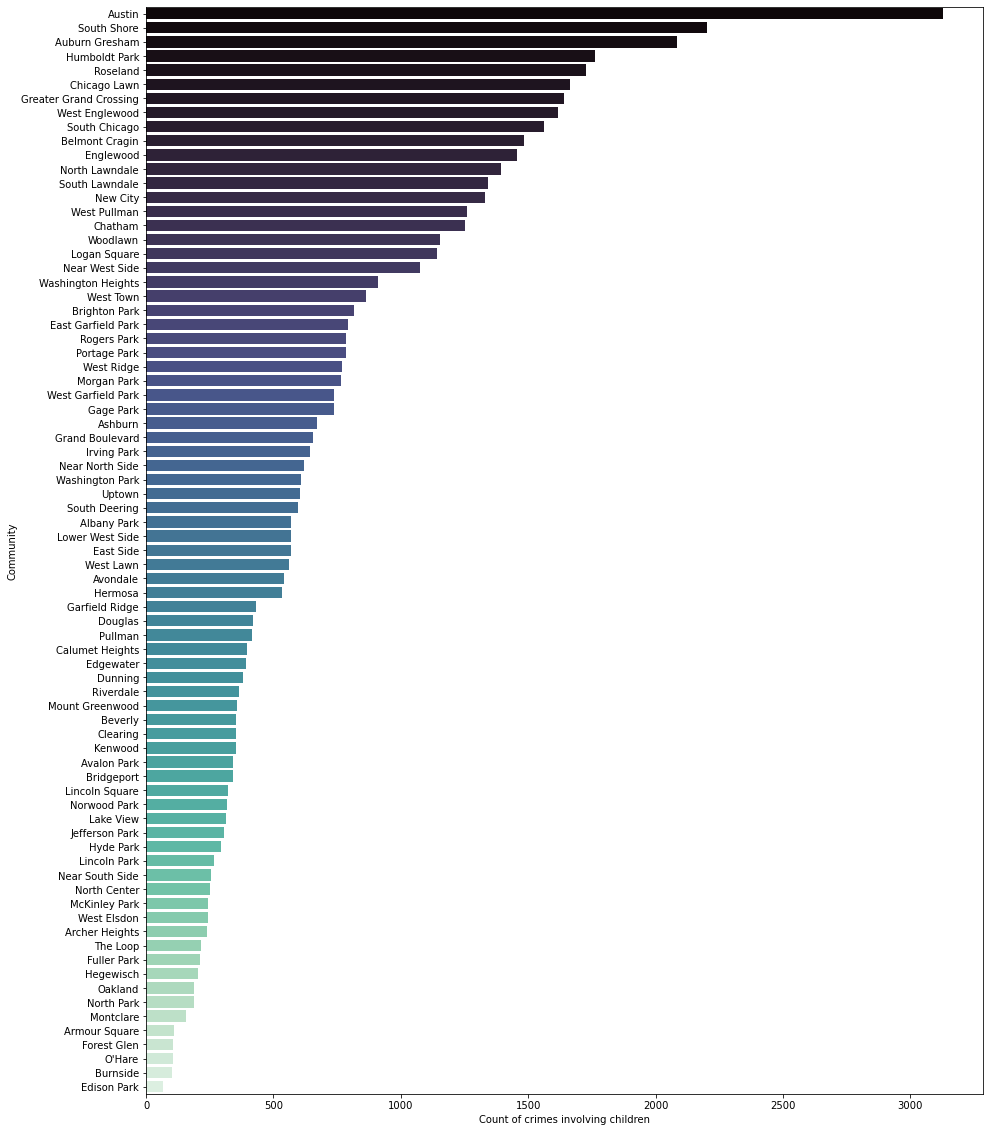

In [2]:
# merging area codes with community numbers
area_codes = pd.read_csv('area_code.csv')
df = df.dropna(subset= ['number'])
data = pd.merge(df, area_codes[['number', 'area_codes']], left_on='number', right_on='number', how='left')
data.head()

# getting the required data for plot
plot = data[(data['primary_type'] == 'OFFENSE INVOLVING CHILDREN') | (data['primary_type'] == 'KIDNAPPING')]
plot = plot[['area_codes', 'count']].groupby('area_codes').sum().reset_index()

# plotting a horizontal bar chart with Community (Y axis) and Count of crimes involving children (X axis)
plt_1 = (15, 20)
fig, ax = plt.subplots(figsize=plt_1)
ax = sns.barplot(data = plot, x = 'count', y= 'area_codes', palette = 'mako', order=plot.sort_values('count',ascending=False).area_codes)
plt.xlabel("Count of crimes involving children")
plt.ylabel("Community")
plt.show()

#### 11) Plot a heatmap between Crime Types vs Community and Count (color/number) in each cell.

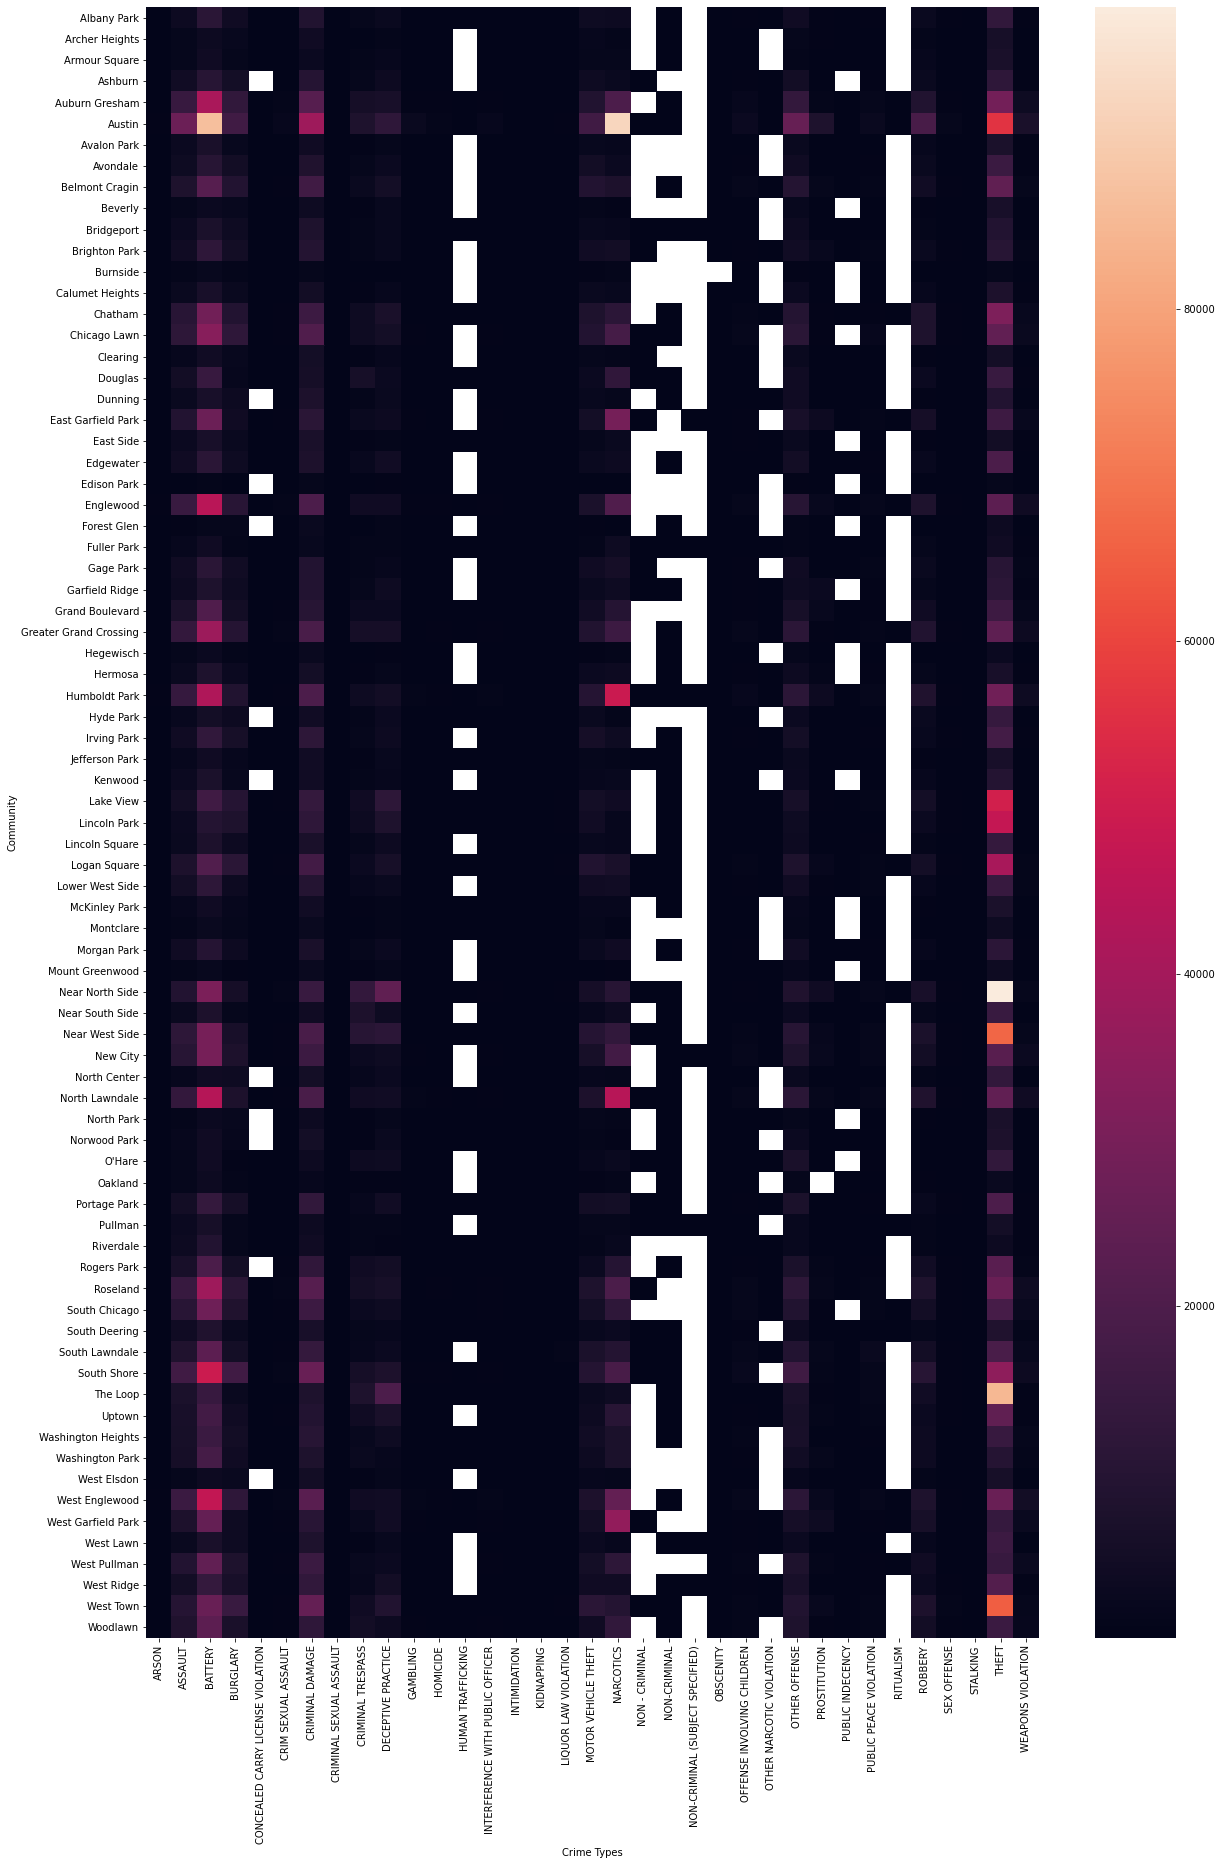

In [3]:
df2 = data[['area_codes', 'primary_type', 'count']].groupby(by = ['area_codes', 'primary_type']).sum().reset_index()
plt_2 = pd.pivot(data=df2, index = 'area_codes', columns = 'primary_type', values = 'count')
plt_2 = plt_2.sort_index()

plt.figure(figsize=(20,30))
sns.heatmap(plt_2, annot=False)
plt.xlabel("Crime Types")
plt.ylabel("Community")
plt.show()
plt.show()

In [4]:
# Thank you